#     Machine Learning in Finance
##     NOVA IMS
####     Group G: Carlos Cardoso - 20211220 | Carlota Reis - 20211208 | Guilherme Miranda - 20210420 | Mariana Garcia - 20210838 

# Project 1 - Regression
## Forecasting the number of motor insurance claims
### This notebook uses the dateset *freMTPL2freq.csv*

(c) Nuno António 2022 - Rev. 1.0

## Dataset description

- **IDpol**: The policy ID (used to link with the claims dataset).
- **ClaimNb**: Number of claims during the exposure period.
- **Exposure**: The exposure period.
- **Area**: The area code.
- **VehPower**: The power of the car (ordered categorical).
- **VehAge**: The vehicle age, in years.
- **DrivAge**: The driver age, in years (in France, people can drive a car at 18).
- **BonusMalus**: Bonus/malus, between 50 and 350: <100 means bonus, >100 means malus in France.
- **VehBrand**: The car brand (unknown categories).
- **VehGas**: The car gas, Diesel or regular.
- **Density**: The density of inhabitants (number of inhabitants per km2) in the city the driver of the car lives in.
- **Region**: The policy regions in France (based on a standard French classification)

For additional information on the dataset check https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3164764

## Work description

### Overview
<p>You should organize into groups of 3 to 5 students, where you will assume the role of a consultant. You are asked to develop a model to forecast how many claims will each policy holder from a car insurer in France have in the following year. The insurance company wants to use this model to improve the policies' premiums (pricing).</p>
<p>Employing the CRISP-DM process model, you are expected to define, describe and explain the model built. Simultaneous, you should explain how your model can help the insurance company reaching its objectives.</p>

### Questions or additional informations
For any additional questions, don't hesitate to get in touch with the instructor. The instructor will also act as the insurance company/project stakeholder.

# ----------------

The Project 1 objective consists in developing a predictive data analytics solution for a French insurance company, following a CRISP-DM methodology.
The developed model seeks to forecast the number of claims each policyholder will have in the following year. By having this information, the insurance company could adjust its pricing model for the next year’s premiums according to the predicted number of claims.


### Business Understading


This phase of the CRIPS-DM framework is somehow compromised since we can’t contact the insurance French company and interact with its associates and workers. It would be interesting to contact a sales team member and observe their daily activity. Besides the top management, it would be also fundamental to contact the IT department to assess the analytics and the data availability. One could also already get some key insights of the company’s data.
Given the business objective, the target variable defined in this problem is the number of claims.


## Initializations and data loading

In [1]:
# Loading packages
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn import metrics
from yellowbrick.model_selection import RFECV
from yellowbrick.model_selection import LearningCurve
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

In [2]:
# Loading the dataset and visualizing summary statistics
ds = pd.read_csv('freMTPL2freq.csv')
ds.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
IDpol,678013.0,NaN,NaN,NaN,2621856.921071,1641782.752655,1.0,1157951.0,2272152.0,4046274.0,6114330.0
ClaimNb,678013.0,NaN,NaN,NaN,0.053247,0.240117,0.0,0.0,0.0,0.0,16.0
Exposure,678013.0,NaN,NaN,NaN,0.52875,0.364442,0.002732,0.18,0.49,0.99,2.01
Area,678013,6,C,191880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VehPower,678013.0,NaN,NaN,NaN,6.454631,2.050906,4.0,5.0,6.0,7.0,15.0
VehAge,678013.0,NaN,NaN,NaN,7.044265,5.666232,0.0,2.0,6.0,11.0,100.0
DrivAge,678013.0,NaN,NaN,NaN,45.499122,14.137444,18.0,34.0,44.0,55.0,100.0
BonusMalus,678013.0,NaN,NaN,NaN,59.761502,15.636658,50.0,50.0,50.0,64.0,230.0
VehBrand,678013,11,B12,166024,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VehGas,678013,2,Regular,345877,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Show top rows
ds.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1,0.10,D,5,0,55,50,B12,Regular,1217,R82
1,3.0,1,0.77,D,5,0,55,50,B12,Regular,1217,R82
2,5.0,1,0.75,B,6,2,52,50,B12,Diesel,54,R22
3,10.0,1,0.09,B,7,0,46,50,B12,Diesel,76,R72
4,11.0,1,0.84,B,7,0,46,50,B12,Diesel,76,R72


### Summary Statistics

The data presented in freMTPL2freq has a total of 678 013 observations, described along 12 different variables/attributes/descriptors/features.
The minimum and maximum values of all the numeric features seem to be in line with the variables’ units. Although it is possible to start questioning the maximum values of the features: Claim Numbers, Exposure and Vehicle Age.


## Data Understanding

The previous summary statistics and data overview also concern the Data Understanding phase.
It is crucial to deepen the data understanding and examine the dataset and hence it is further verified the presence/absence of missing values, followed by a graphical visualization.
It is confirmed that the data doesn’t present missing values.

In [4]:
# Confirm that there are not any missing values
print(ds.isnull().sum())

# No missing values on the dataset

IDpol         0
ClaimNb       0
Exposure      0
Area          0
VehPower      0
VehAge        0
DrivAge       0
BonusMalus    0
VehBrand      0
VehGas        0
Density       0
Region        0
dtype: int64


Regarding the attributes’ type, there is 4 categorical variables: Area, Vehicle Brand, Vehicle Gas and Region, with the remaining variables being numeric.

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDpol       678013 non-null  float64
 1   ClaimNb     678013 non-null  int64  
 2   Exposure    678013 non-null  float64
 3   Area        678013 non-null  object 
 4   VehPower    678013 non-null  int64  
 5   VehAge      678013 non-null  int64  
 6   DrivAge     678013 non-null  int64  
 7   BonusMalus  678013 non-null  int64  
 8   VehBrand    678013 non-null  object 
 9   VehGas      678013 non-null  object 
 10  Density     678013 non-null  int64  
 11  Region      678013 non-null  object 
dtypes: float64(2), int64(6), object(4)
memory usage: 62.1+ MB


Categorical Variables

In [6]:
# Transforming those variables into categorical
cols = ['Area', 'VehBrand', 'VehGas','Region']
ds[cols] = ds[cols].apply(lambda x:x.astype('category'))
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   IDpol       678013 non-null  float64 
 1   ClaimNb     678013 non-null  int64   
 2   Exposure    678013 non-null  float64 
 3   Area        678013 non-null  category
 4   VehPower    678013 non-null  int64   
 5   VehAge      678013 non-null  int64   
 6   DrivAge     678013 non-null  int64   
 7   BonusMalus  678013 non-null  int64   
 8   VehBrand    678013 non-null  category
 9   VehGas      678013 non-null  category
 10  Density     678013 non-null  int64   
 11  Region      678013 non-null  category
dtypes: category(4), float64(2), int64(6)
memory usage: 44.0 MB


The number of levels from the Area, Vehicle Brand, Vehicle Gas and Region are 6, 11, 2 and 22, respectively.
The Area’s levels are attributed alphabetically from A to F, with the areas C, D, E and A being the ones with the most observations. Concerning the Vehicle Brands, there are unknown and classified with the letter “B” followed by a number. The most observed Vehicle Brands are B12, B1 and B2. The Vehicle Gas classification is straightforward being determined as Regular or Diesel and is almost equally distributed with 48.99% being Diesel and the remaining as Regular. The Region is the feature with the highest levels (22). These are named with an “R” followed by a number, and according to the description, it follows the standard French Classification. The most observed regions among the policyholders are R24, R82, R93 and R11.
It was further computed a graphical visualization of some relationships between variables, to gain further insights. 

In [7]:
# Counts per category level
ds['Area'].value_counts()
ds['VehBrand'].value_counts()
ds['VehGas'].value_counts()
ds['Region'].value_counts()

# Top Counts 
categorical = ['Area', 'VehBrand', 'VehGas','Region']
categorical=ds.select_dtypes(exclude=["number","bool_","object_"]).columns.tolist()  #select all variables excep number, bool and obj
categorical
for var in ds[categorical]:
    print(var,":\n",ds[var].value_counts(), sep="")

Area:
C    191880
D    151596
E    137167
A    103957
B     75459
F     17954
Name: Area, dtype: int64
VehBrand:
B12    166024
B1     162736
B2     159861
B3      53395
B5      34753
B6      28548
B4      25179
B10     17707
B11     13585
B13     12178
B14      4047
Name: VehBrand, dtype: int64
VehGas:
Regular    345877
Diesel     332136
Name: VehGas, dtype: int64
Region:
R24    160601
R82     84752
R93     79315
R11     69791
R53     42122
R52     38751
R91     35805
R72     31329
R31     27285
R54     19046
R73     17141
R41     12990
R25     10893
R26     10492
R23      8784
R22      7994
R83      5287
R74      4567
R94      4516
R21      3026
R42      2200
R43      1326
Name: Region, dtype: int64


In [8]:
#Percentage of Diesel presence in the Dataframe
ds['VehGas'].value_counts().Diesel/678013*100

48.98667134700957

In [9]:
# Exploration of categorical variables

#Region and Vehicle Brand
tb1 = pd.crosstab(index=ds['Region'], columns=ds['VehBrand'])

#Area and Vehicle Brand
tb2 = pd.crosstab(index=ds['Area'], columns=ds['VehBrand'])

#Region and ClaimNb
tb3 = pd.crosstab(index=ds['Region'], columns=ds['ClaimNb'])

#VehBrand and ClaimNb
tb5 = pd.crosstab(index=ds['VehBrand'], columns=ds['ClaimNb'])


<AxesSubplot:xlabel='VehBrand'>

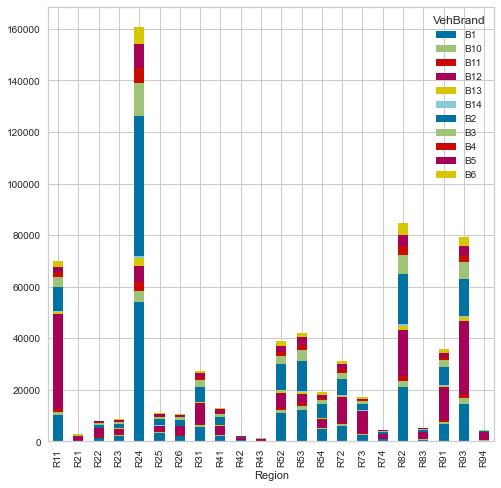

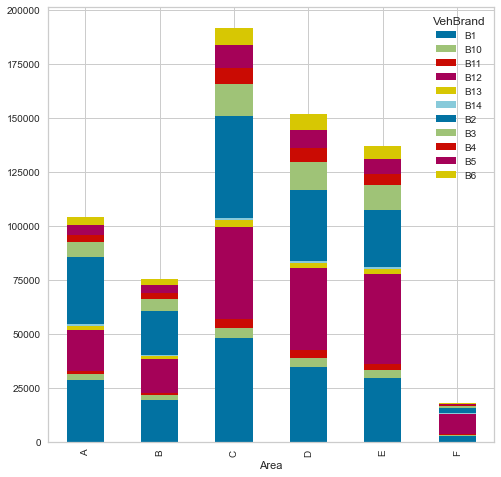

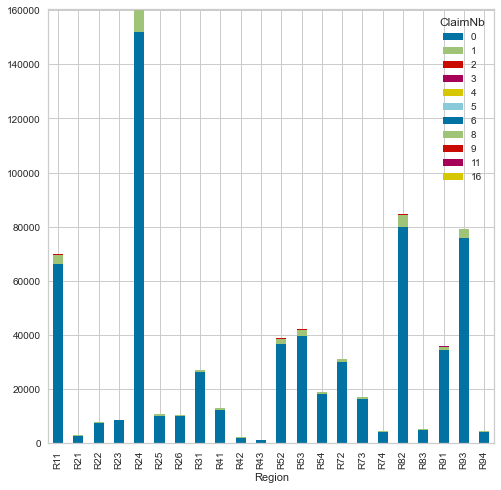

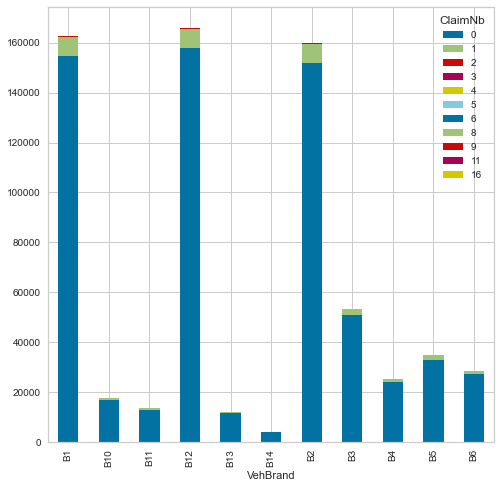

In [10]:
# Visualization

#Region and Vehicle Brand
tb1.plot(kind="bar", figsize=(8,8), stacked=True)

#Area and Vehicle Brand
tb2.plot(kind="bar", figsize=(8,8), stacked=True)

#Region and ClaimNb
tb3.plot(kind="bar", figsize=(8,8), stacked=True)

#VehBrand and ClaimNb
tb5.plot(kind="bar", figsize=(8,8), stacked=True)



1st graphic: As one can observe, regions R24, R82, R94 and R11 are the areas with the most observations. Brands B12, B1 and B2 are the ones with more emphasis on the 1st graphic. There are many regions with lower observations, for instance below 20,000 which are possible candidates to group later.

2nd graphic: When comparing the areas with the vehicle brands, it is possible to infer that areas C, D and E are the most populated among the policyholders with vehicles of brands B1, B2 and B12. Area F is the one with the least observations which later could be also grouped with another region, possibly region B.

3rd graphic: It is compared the number of claims with the policyholders’ regions. Region R24 is the region with the highest observations. There are also many regions with few observations. So, it is important to consolidate this graphic with the percentage of claims of each region. The region with the highest percentage of zero claims is R23 (96.7668%) but it has few observations and we can see on the graphic. Region R53 is the one with the lowest zero % claims (93.8868%) and it has a significant number of observations. Additionally, the region with the highest number of claims of an individual policyholder (16) is region R91 and with 11 individuals’ claims is again region R91 and also region R24.

4th graphic: From this graphic brands B1, B12 and B2 are the ones with the most observations and probably with the highest presence of different claim numbers. By consolidating with the cross table, we can see that brand B1 is the brand with the largest number of claims per policyholder, followed by brand B2.  There’s also some brand with few observations that might be candidates for category grouping (B14, B13, B11, B10).

Numerical Variables

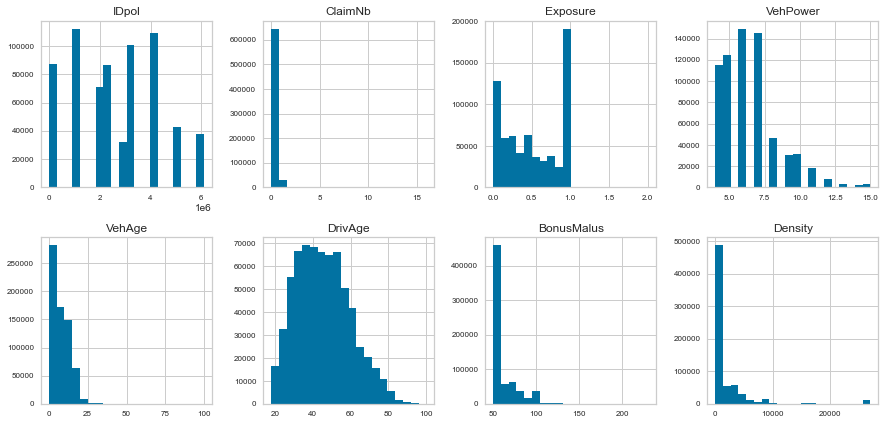

In [11]:
numerical=ds.select_dtypes(include=[np.number]).columns.tolist()
ds[numerical].hist(bins=20, figsize=(15, 15), layout=(4, 4), xlabelsize=8, ylabelsize=8);

From the histograms it is possible to get a glance of the numeric variables’ distributions.
Clearly the predominant number of claims is zero, with few observations having one or more claims. This is a sign that the data is not balanced but also it makes sense given the context that this is an insurance company and the number of claims is usually way less than the number of policies. 
The vehicle power demonstrates a positive skew, as well as vehicle age, driver’s age, bonus malus and density. This is also in line with the median and mean values.


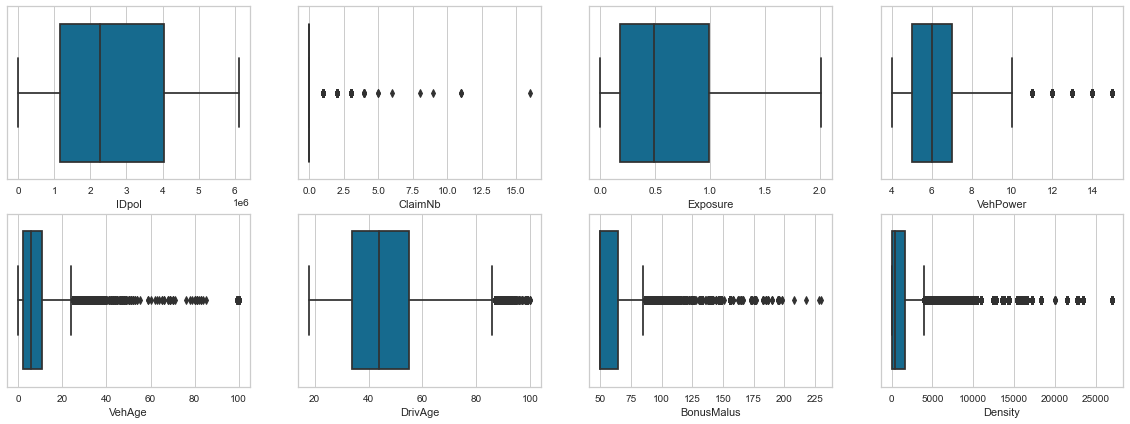

In [12]:
# Do boxplots on all numeric variables
fig, ax = plt.subplots(2, 4, figsize=(20, 7))
for var, subplot in zip(ds[numerical], ax.flatten()):
    sns.boxplot(x=ds[var], ax=subplot)

Boxplots provide insights regarding the possible existance of outliers for each variables. Using the ones plotted above (for the numerical variables) some of them clearly present outliers: ClaimNb, Exposure, VehPower, VehAge, DrivAge and BonusMalus. As for the density variable, higher density does not necessarily represent the existance of outliers.

C:\Users\lotar\AppData\Local\Temp\ipykernel_20548\22763989.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


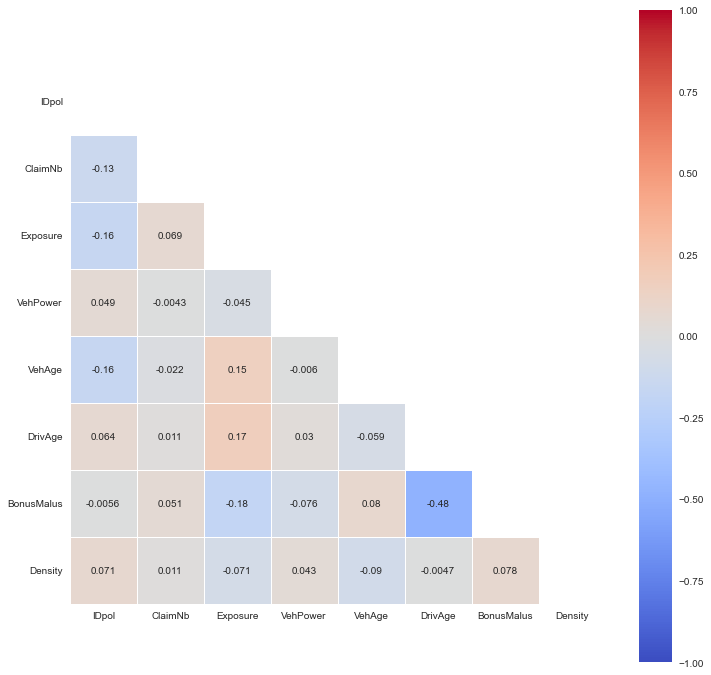

In [13]:
#Pearson Correlation only for numerical
corr = ds[numerical].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(12, 12))
heatmap = sns.heatmap(corr,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 10})

#add the column names as labels
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns, rotation = 0)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

Using the figure above, where it is represented the pearson correlation between the numerical features, some pairs present relatively higher correlation between them when compared to others. For instance, BonusMalus and DrivAge (0,48 in absolut terms).

In [14]:
# Pair plot some of the numerical variables with Vehicle Brand

#cols=['ClaimNb','Exposure','VehPower','VehAge','DrivAge','BonusMalus','Density','VehBrand']
#g = sns.pairplot(ds[cols], hue="VehBrand")

Above follows the code to perform paiplots between all numerical variables

<AxesSubplot:xlabel='VehAge'>

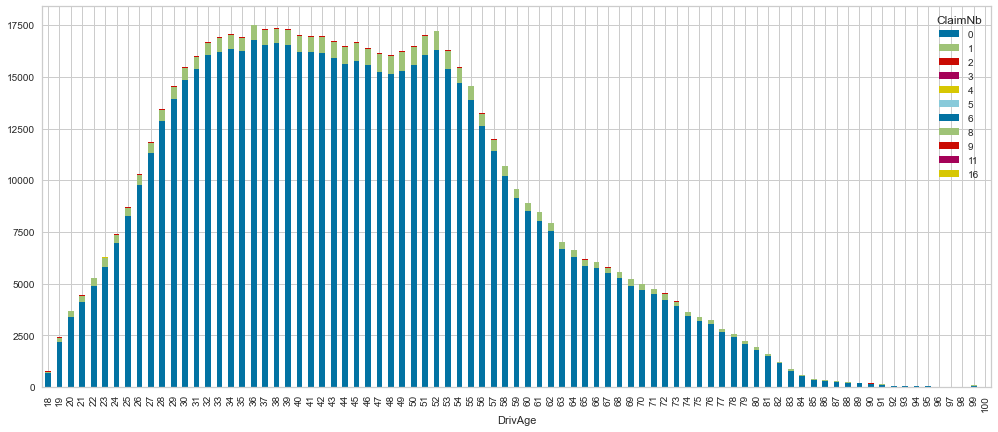

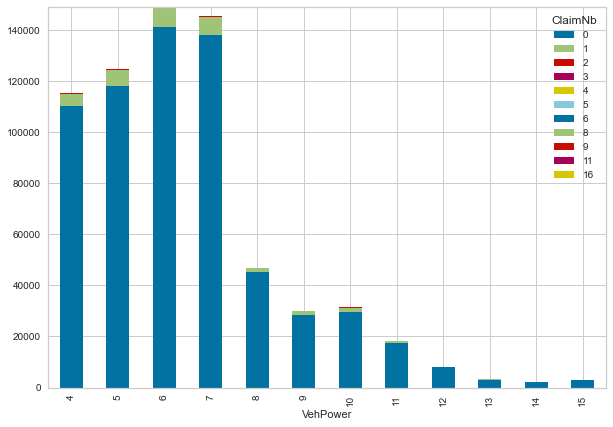

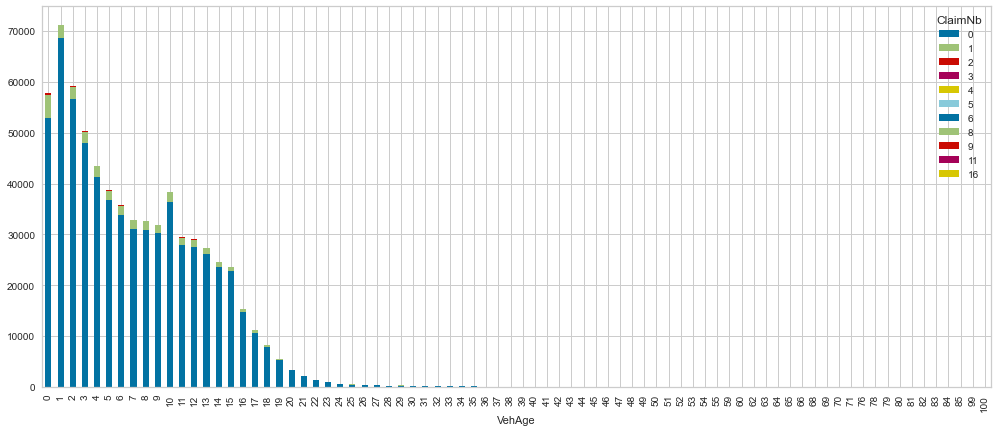

In [15]:
#Visualization

#Driver's Age and ClaimNb
tb4 = pd.crosstab(index=ds['DrivAge'], columns=ds['ClaimNb'])
tb4.plot(kind="bar", figsize=(17,7), stacked=True)

#VehPower and ClaimNb

tb6 = pd.crosstab(index=ds['VehPower'], columns=ds['ClaimNb'])
tb6.plot(kind="bar", figsize=(10,7), stacked=True)

#VehAge and ClaimNb

tb7 = pd.crosstab(index=ds['VehAge'], columns=ds['ClaimNb'])
tb7.plot(kind="bar", figsize=(17,7), stacked=True)

## Data Preparation LR

In [16]:
# Create a modeling dataset from the original dataset
X = ds.copy(deep=True)

In [17]:
X.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
IDpol,678013.0,NaN,NaN,NaN,2621856.921071,1641782.752655,1.0,1157951.0,2272152.0,4046274.0,6114330.0
ClaimNb,678013.0,NaN,NaN,NaN,0.053247,0.240117,0.0,0.0,0.0,0.0,16.0
Exposure,678013.0,NaN,NaN,NaN,0.52875,0.364442,0.002732,0.18,0.49,0.99,2.01
Area,678013,6,C,191880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VehPower,678013.0,NaN,NaN,NaN,6.454631,2.050906,4.0,5.0,6.0,7.0,15.0
VehAge,678013.0,NaN,NaN,NaN,7.044265,5.666232,0.0,2.0,6.0,11.0,100.0
DrivAge,678013.0,NaN,NaN,NaN,45.499122,14.137444,18.0,34.0,44.0,55.0,100.0
BonusMalus,678013.0,NaN,NaN,NaN,59.761502,15.636658,50.0,50.0,50.0,64.0,230.0
VehBrand,678013,11,B12,166024,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VehGas,678013,2,Regular,345877,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Find and remove outliers

# Function to find outliers on columns based on percentile
def removeOutliers(df, colList, lowPercentile=0.05, highPercentile=0.95, verbose=False):
    quant_df = df[colList].quantile([lowPercentile, highPercentile])
    if verbose:
        print(quant_df)
    for name in list(df[colList].columns):
        df = df[(df[name] >= quant_df.loc[lowPercentile, name]) & (df[name] <= quant_df.loc[highPercentile, name])]
    return df

# Claim Number
X.drop(X[X.ClaimNb > 7].index, inplace=True)

# Exposure
X.loc[(X['Exposure'] > 1)] == 1

# Vehicle Power
cols = ['VehPower']
X = removeOutliers(X, colList=cols , verbose=True)

# Vehicle Age
X.drop(X[X.VehAge > 35].index, inplace=True)


# Driver's Age
cols = ['DrivAge']
X = removeOutliers(X, colList=cols, lowPercentile=0.00, highPercentile=0.99, verbose=True)

# Bonus Malus
X.drop(X[X.BonusMalus > ((max(X.BonusMalus)-100)/2)+100].index, inplace=True)

X.describe().T

      VehPower
0.05       4.0
0.95      11.0
      DrivAge
0.00     18.0
0.99     80.0


,count,mean,std,min,25%,50%,75%,max
IDpol,654729.0,2.608857e+06,1.639082e+06,1.000000,1154843.00,2269955.00,4041436.00,6114330.00
ClaimNb,654729.0,5.318536e-02,2.378317e-01,0.000000,0.00,0.00,0.00,6.00
Exposure,654729.0,5.279595e-01,3.642680e-01,0.002732,0.17,0.49,0.99,2.01
VehPower,654729.0,6.294019e+00,1.780453e+00,4.000000,5.00,6.00,7.00,11.00
VehAge,654729.0,7.027170e+00,5.510512e+00,0.000000,2.00,6.00,11.00,35.00
DrivAge,654729.0,4.510123e+01,1.372731e+01,18.000000,34.00,44.00,54.00,80.00
BonusMalus,654729.0,5.989299e+01,1.568537e+01,50.000000,50.00,50.00,66.00,163.00
Density,654729.0,1.771515e+03,3.899493e+03,1.000000,92.00,392.00,1629.00,27000.00


DriveAge: As the goal is to infer the number of claims per year, elderly people have higher claim frequency and thus the 1% and 99% percentiles were considered as outliers.

Area: As for this variable, higher values do not necessarily represent the existance of outliers since it is correlated with the number of inhabitants.

Exposure: The default exposure is one and thus values higher than this were considered as errors and assumed to be 1.

ClaimNb: Using the boxplots, number of claims per year higher than 7 were considered as outliers as the number os instances with these values was low.

VehAge: The older vehicles in this data set were considered outliers, since they can represent an old car collection or even a museum's collection since those vehicles still need insurance, but for the scope of our project these vehicles are not relevant to number of claims. Based on the graph, the outliers were considered for vehicles with age above 35 years. 

Driver’s Age: The top and bottom 1% were considered as outliers.

Bonus Malus: Taking into consideration that values above 100 are considered "Malus" and the maximum value in our sample is 230, observations higher than the intermediate point between those (163) were considered outliers.


In [19]:
#Number of removed observations, after outliers
diff = X.shape[0]-ds.shape[0]
diff/ds.shape[0]

-0.0343415244250479

<AxesSubplot:xlabel='VehPower'>

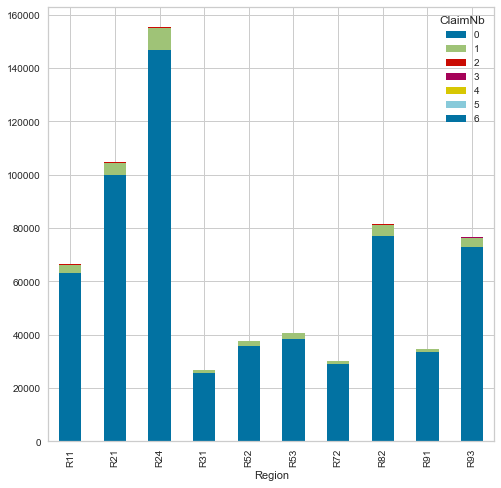

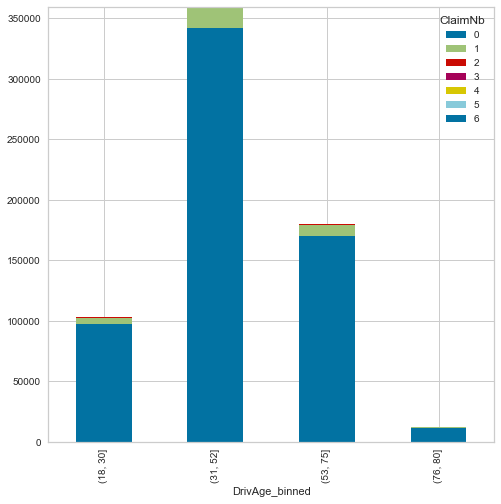

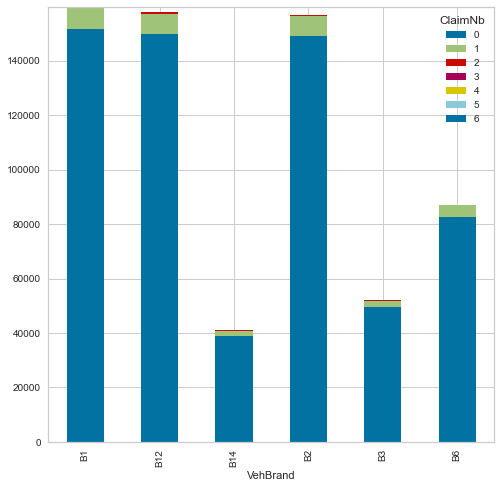

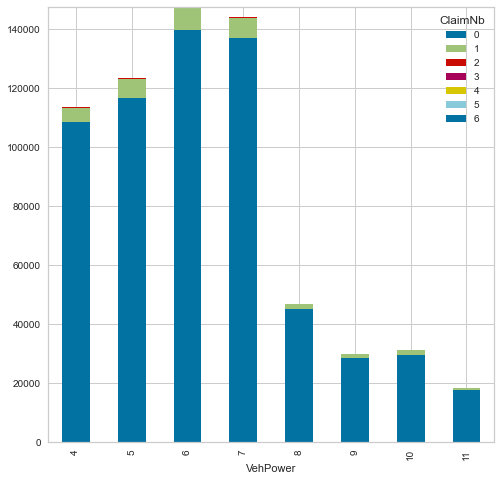

In [20]:
# Group Region

X['Region'] = X['Region'].replace(['R22','R23','R25','R26','R41','R42','R43','R74','R83','R94','R54','R73'],'R21')

#Plot
tb3_1 = pd.crosstab(index=X['Region'], columns=X['ClaimNb'])
tb3_1.plot(kind="bar", figsize=(8,8), stacked=True)

# Bin the Driver's age
binsInterval = [17, 30, 52, 75, 81] # Create bins interval based on distribution/quartiles
intervalLabels = ['(18, 30]', '(31, 52]',  '(53, 75]', '(76, 80]']
X['DrivAge_binned'] = pd.cut(X['DrivAge'], bins = binsInterval, labels=intervalLabels)

tb4_1 = pd.crosstab(index=X['DrivAge_binned'], columns=X['ClaimNb'])
tb4_1.plot(kind="bar", figsize=(8,8), stacked=True)

#Group Vehicle Brand

X['VehBrand'] = X['VehBrand'].replace(['B10','B11','B13'],'B14')
X['VehBrand'] = X['VehBrand'].replace(['B4','B5'],'B6')


#Plot
tb5_1 = pd.crosstab(index=X['VehBrand'], columns=X['ClaimNb'])
tb5_1.plot(kind="bar", figsize=(8,8), stacked=True)

#Group Vehicle Power

X['VehPower'] = X['VehPower'].replace(['11','12','13','14'],'15')

#Plot
tb6_1 = pd.crosstab(index=X['VehPower'], columns=X['ClaimNb'])
tb6_1.plot(kind="bar", figsize=(8,8), stacked=True)

Region:
The regions with less claim observations were aggregated, this includes zones with less than 20 000 observations, maintaining the regions with bigger claim quantities. 

Driver’s Age:
Based on the plot, we can identify four stages: growth, stable, descending and residual. We grouped Driver’s Age from age 18 to 30 (young adults), 31 to 52 (adults), 53 to 75 (mature) and above 75 (elderly). 

Vehicle brand:
The vehicle brands were grouped according to the claims observations which brand had, meaning brands with less than 20 000 claim observations and the brands with less than 40 000 were grouped together. 

Vehicle Power:
The vehicle power categories with less than 20 000 claim observations were grouped together.

The IDpol variable was eliminated because it does not explain the number of claims.


In [21]:
X.groupby('DrivAge_binned')['ClaimNb'].agg('count')

DrivAge_binned
(18, 30]    102894
(31, 52]    359645
(53, 75]    179684
(76, 80]     12506
Name: ClaimNb, dtype: int64

In [22]:
#Grouping Variables according p-values below

# Group Region

X['Region'] = X['Region'].replace(['R53'],'R24')

After computing the regression itself, using the values obtained for the p-value of each variable, we reached to the conclusion that Region 53 and Region 24 should be group to better explain the target variable (claim frequency).

In [23]:
# Encode categorical values into dummy variables
cols = ['Area', 'VehBrand', 'VehGas', 'Region','DrivAge_binned']
ce_one_hot = ce.OneHotEncoder(cols = cols, use_cat_names=True)
X = ce_one_hot.fit_transform(X)
X

,IDpol,ClaimNb,Exposure,Area_D,Area_B,Area_E,Area_C,Area_F,Area_A,VehPower,...,Region_R31,Region_R91,Region_R52,Region_R93,Region_R11,Region_R24,"DrivAge_binned_(18, 30]","DrivAge_binned_(31, 52]","DrivAge_binned_(53, 75]","DrivAge_binned_(76, 80]"
0,1.0,1,0.10000,1,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,1,0
1,3.0,1,0.77000,1,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,1,0
2,5.0,1,0.75000,0,1,0,0,0,0,6,...,0,0,0,0,0,0,0,1,0,0
3,10.0,1,0.09000,0,1,0,0,0,0,7,...,0,0,0,0,0,0,0,1,0,0
4,11.0,1,0.84000,0,1,0,0,0,0,7,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678008,6114326.0,0,0.00274,0,0,1,0,0,0,4,...,0,0,0,1,0,0,0,0,1,0
678009,6114327.0,0,0.00274,0,0,1,0,0,0,4,...,0,0,0,0,1,0,0,1,0,0
678010,6114328.0,0,0.00274,1,0,0,0,0,0,6,...,0,0,0,0,0,0,0,1,0,0
678011,6114329.0,0,0.00274,0,1,0,0,0,0,4,...,0,0,0,0,0,0,0,0,1,0


Here, the categorical variables were divided into dummy variables.

In [24]:
#Create the target (Claim number per year)
y = X['ClaimNb']/X['Exposure']

# Drop not used columns
cols = ['IDpol', 'ClaimNb', 'Exposure','VehPower','VehAge','DrivAge','BonusMalus','Density']
X1 = X.drop(columns=cols)

# Normalize all columns
# MinMax scaler returns an array, so the dataframe must be recreated
X1 = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(X1.values), columns=X1.columns,index=X1.index)

for cols in cols:
    X1[cols]=X[cols]



X=X1

X.drop("ClaimNb", axis=1, inplace=True)  #Remove Claim Nb which is the target variable
X.drop("IDpol", axis=1, inplace=True)    #Remove IDpolicy since logicaly doesn't explain the number of claims
X.drop("Exposure", axis=1, inplace=True)  #Remove Exposure which is in the target variable


#P-Value - removing variables

   
X.drop("Region_R82", axis=1, inplace=True)   
X.drop("Region_R21", axis=1, inplace=True)
X.drop("Region_R72", axis=1, inplace=True)
X.drop("Region_R31", axis=1, inplace=True)
X.drop("Region_R91", axis=1, inplace=True)
X.drop("Region_R52", axis=1, inplace=True)
X.drop("Region_R93", axis=1, inplace=True)
X.drop("Region_R11", axis=1, inplace=True)
X.drop("Region_R24", axis=1, inplace=True)

X.drop("Area_D", axis=1, inplace=True)    
X.drop("Area_B", axis=1, inplace=True) 
X.drop("Area_E", axis=1, inplace=True) 
X.drop("Area_C", axis=1, inplace=True) 
X.drop("Area_F", axis=1, inplace=True) 
X.drop("Area_A", axis=1, inplace=True) 

X.drop("VehBrand_B12", axis=1, inplace=True) 
X.drop("VehBrand_B6", axis=1, inplace=True) 
X.drop("VehBrand_B3", axis=1, inplace=True) 
X.drop("VehBrand_B2", axis=1, inplace=True) 
X.drop("VehBrand_B14", axis=1, inplace=True) 
X.drop("VehBrand_B1", axis=1, inplace=True) 

X.drop("VehGas_Regular", axis=1, inplace=True) 
X.drop("VehGas_Diesel", axis=1, inplace=True) 


X.columns

Index(['DrivAge_binned_(18, 30]', 'DrivAge_binned_(31, 52]',
       'DrivAge_binned_(53, 75]', 'DrivAge_binned_(76, 80]', 'VehPower',
       'VehAge', 'DrivAge', 'BonusMalus', 'Density'],
      dtype='object')

After running the model for the first time, we decided to evaluate the explanatory power of each variable using the obtained p-value for each. We reached to the conclusion that some of these variables, according to this measure, were not statistically significant to explain the target variable. Thus, we proceeded to iteratively eliminate those, analysing the new p-values each time.
By the end of all iterations, we decided to drop variables Region, Area, VehBrand and VehGas.

## Modeling LR

In [25]:
# Split the dataset intro train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, random_state = 52)

In [26]:
#P-Value

from statsmodels.api import OLS

lr_regr = linear_model.LinearRegression()

OLS(y_train,X_train).fit().summary()


C:\Users\lotar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\lotar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     59.66
Date:                Wed, 25 May 2022   Prob (F-statistic):           5.82e-98
Time:                        21:50:25   Log-Likelihood:            -1.4191e+06
No. Observations:              491046   AIC:                         2.838e+06
Df Residuals:                  491037   BIC:                         2.838e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
DrivAge_binned_(18, 30]    -0.0258      0.060     -0.430      0.667      -0.144       0.092
DrivAge_binned_(31, 52]    -0.0196      0.064     -0.307      0.759      -0.145       0.105
DrivAge_binned_(53, 75]    -0.0459      0.081     -0.566      0.571      -0.205       0.113
DrivAge_binned_(76, 80]    -0.1068      0.106     -1.005      0.315      -0.315       0.102
VehPower                   -0.0002      0.004     -0.062      0.950      -0.007       0.007
VehAge                     -0.0209      0.001    -18.324      0.000      -0.023      -0.019
DrivAge                     0.0022      0.001      2.029      0.042    7.53e-05       0.004
BonusMalus                  0.0057      0.000     11.533      0.000       0.005       0.007
Density                  1.891e-06   1.62e-06      1.171      0.242   -1.28e-06    5.06e-06
==============================================================================
Omnibus:                  1578763.430   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     291973469177.910
Skew:                          53.390   Prob(JB):                         0.00
Kurtosis:                    3779.093   Cond. No.                     1.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This summary statistics was relevant to determine which variables to drop

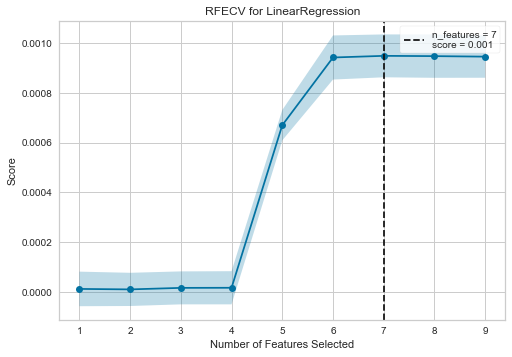

<AxesSubplot:title={'center':'RFECV for LinearRegression'}, xlabel='Number of Features Selected', ylabel='Score'>

In [27]:
# Initialize model
lr_regr = linear_model.LinearRegression()

# Apply RFECV
vis = RFECV(lr_regr, cv=5, scoring='r2')
vis.fit(X_train, y_train)
vis.show()


The RFECV graph above allows us to conclude that:
    - After 4 features, the score increases almost exponetially (corresponds to the VehAge variable). After 6 features the evolution of the score stabilizes.

In [28]:
# Features to include (all in this case)
X.columns[vis.support_]

Index(['DrivAge_binned_(18, 30]', 'DrivAge_binned_(31, 52]',
       'DrivAge_binned_(53, 75]', 'DrivAge_binned_(76, 80]', 'VehAge',
       'DrivAge', 'BonusMalus'],
      dtype='object')

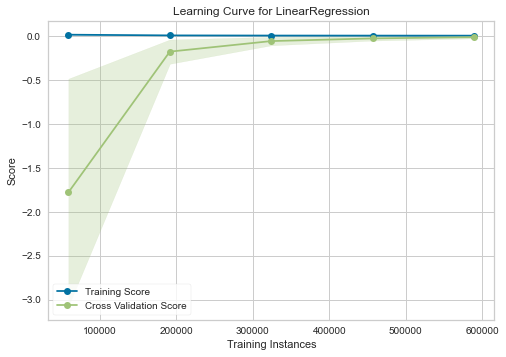

<AxesSubplot:title={'center':'Learning Curve for LinearRegression'}, xlabel='Training Instances', ylabel='Score'>

In [29]:
# Plot the learning curve
cv = 10  #cross validation
sizes = np.linspace(0.1, 1.0, 5)
visualizer = LearningCurve(estimator=lr_regr, cv=cv, scoring='r2', train_sizes=sizes, n_jobs=4, 
                           random_state=123)
visualizer.fit(X, y)
visualizer.show()     

Using the Learning Curve graph above, one can observe that, as the training instances increases, the gap between the training score and the cross validation score decreases. 

In [30]:
# Create and train the model
lr_regr.fit(X_train, y_train)

LinearRegression()

In [31]:
# Print the Intercept
print('Intercept:',lr_regr.intercept_, '\n')

# Print Coefficients by descending "importance"
formattedList = [format(float(i),'.6f') for i in lr_regr.coef_]
formattedList2 = [format(abs(float(i)),'.6f') for i in lr_regr.coef_]
data_tuples = list(zip(X.columns,formattedList,formattedList2))
coeff_df = pd.DataFrame(data=data_tuples, columns=['Feature','Coefficient','AbsCoefficient'])
coeff_df['AbsCoefficient']=coeff_df['AbsCoefficient'].astype(float)
coeff_df.sort_values('AbsCoefficient', axis=0, inplace=True, ascending=False)
coeff_df

Intercept: -0.04953304852394241 



,Feature,Coefficient,AbsCoefficient
3,"DrivAge_binned_(76, 80]",-0.057233,0.057233
1,"DrivAge_binned_(31, 52]",0.029915,0.029915
0,"DrivAge_binned_(18, 30]",0.023694,0.023694
5,VehAge,-0.020872,0.020872
7,BonusMalus,0.005684,0.005684
2,"DrivAge_binned_(53, 75]",0.003624,0.003624
6,DrivAge,0.002199,0.002199
4,VehPower,-0.000219,0.000219
8,Density,0.000002,0.000002


## Evaluation LR

In [32]:
# predict y for X_train and X_test
y_pred_train = lr_regr.predict(X_train) 
y_pred_test = lr_regr.predict(X_test) 

In [33]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['MAE','RMSE', 'R^2','MAPE (%)','MAX Error']
  train_results = [metricsObj.mean_absolute_error(yTrain, yPredTrain),
                np.sqrt(metricsObj.mean_squared_error(yTrain, yPredTrain)),
                metricsObj.r2_score(yTrain, yPredTrain),
                metricsObj.mean_absolute_percentage_error(yTrain, yPredTrain),
                metricsObj.max_error(yTrain, yPredTrain)]
  test_results = [metricsObj.mean_absolute_error(yTest, yPredTest),
                np.sqrt(metricsObj.mean_squared_error(yTest, yPredTest)),
                metricsObj.r2_score(yTest, yPredTest),
                  metricsObj.mean_absolute_percentage_error(yTest, yPredTest),
                metricsObj.max_error(yTest, yPredTest)]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [34]:
# Show performance results
resultsDF = performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,MAE,5.038642e-01,5.056426e-01
1,RMSE,4.353633e+00,5.383849e+00
2,R^2,9.710834e-04,6.752516e-04
3,MAPE (%),1.141845e+15,1.144795e+15
4,MAX Error,3.657472e+02,7.316586e+02


C:\Users\lotar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


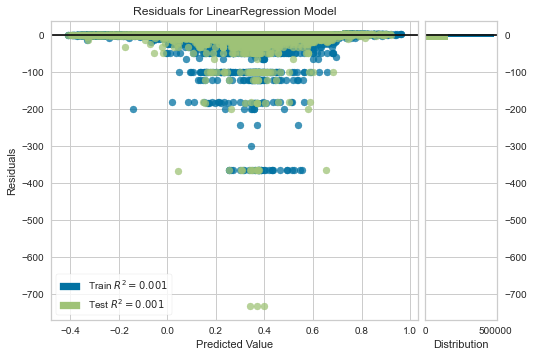

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [35]:
# Visualize the residuals
residuals_vis = ResidualsPlot(lr_regr)
residuals_vis.fit(X_train, y_train)  # Fit the training data to the visualizer
residuals_vis.score(X_test, y_test)  # Evaluate the model on the test data
residuals_vis.show() 

C:\Users\lotar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


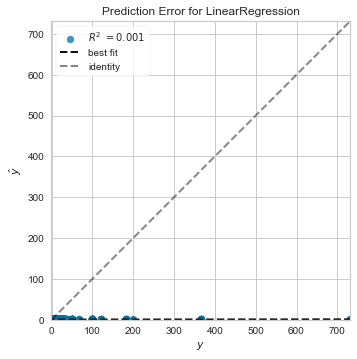

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [36]:
# Visualize the prediction error
predError_vis = PredictionError(lr_regr)
predError_vis.fit(X_train, y_train)  # Fit the training data to the visualizer
predError_vis.score(X_test, y_test)  # Evaluate the model on the test data
predError_vis.show() 

Despite the fact that the results obtained by the model in the training set are similar to the ones obtained using the test set, all obtained measures show us that the model predictive power can be considered weak. One possible reason for such results is the fact that the initial dataset is extremely inbalanced (many more observations reporting zero claims than higher than zero).

## Data Preparation DT

The Data Preparation process for the Decision tree followed the same rationale used before, for the linear regression model.

In [37]:
# Create a modeling dataset from the original dataset
X = ds.copy(deep=True)

In [38]:
# Find and remove outliers

# Function to find outliers on columns based on percentile
def removeOutliers(df, colList, lowPercentile=0.05, highPercentile=0.95, verbose=False):
    quant_df = df[colList].quantile([lowPercentile, highPercentile])
    if verbose:
        print(quant_df)
    for name in list(df[colList].columns):
        df = df[(df[name] >= quant_df.loc[lowPercentile, name]) & (df[name] <= quant_df.loc[highPercentile, name])]
    return df

# Claim Number
X.drop(X[X.ClaimNb > 7].index, inplace=True)

# Exposure
X.loc[(X['Exposure'] > 1)] == 1

# Vehicle Power
cols = ['VehPower']
X = removeOutliers(X, colList=cols , verbose=True)

# Vehicle Age
X.drop(X[X.VehAge > 35].index, inplace=True)


# Driver's Age
cols = ['DrivAge']
X = removeOutliers(X, colList=cols, lowPercentile=0.00, highPercentile=0.99, verbose=True)

# Bonus Malus
X.drop(X[X.BonusMalus > ((max(X.BonusMalus)-100)/2)+100].index, inplace=True)

X.describe().T

      VehPower
0.05       4.0
0.95      11.0
      DrivAge
0.00     18.0
0.99     80.0


,count,mean,std,min,25%,50%,75%,max
IDpol,654729.0,2.608857e+06,1.639082e+06,1.000000,1154843.00,2269955.00,4041436.00,6114330.00
ClaimNb,654729.0,5.318536e-02,2.378317e-01,0.000000,0.00,0.00,0.00,6.00
Exposure,654729.0,5.279595e-01,3.642680e-01,0.002732,0.17,0.49,0.99,2.01
VehPower,654729.0,6.294019e+00,1.780453e+00,4.000000,5.00,6.00,7.00,11.00
VehAge,654729.0,7.027170e+00,5.510512e+00,0.000000,2.00,6.00,11.00,35.00
DrivAge,654729.0,4.510123e+01,1.372731e+01,18.000000,34.00,44.00,54.00,80.00
BonusMalus,654729.0,5.989299e+01,1.568537e+01,50.000000,50.00,50.00,66.00,163.00
Density,654729.0,1.771515e+03,3.899493e+03,1.000000,92.00,392.00,1629.00,27000.00


In [39]:
# Group Region

X['Region'] = X['Region'].replace(['R22','R23','R25','R26','R41','R42','R43','R74','R83','R94','R54','R73'],'R21')

# Bin the Driver's age
binsInterval = [17, 30, 52, 75, 81] # Create bins interval based on distribution/quartiles
intervalLabels = ['(18, 30]', '(31, 52]',  '(53, 75]', '(76, 80]']
X['DrivAge_binned'] = pd.cut(X['DrivAge'], bins = binsInterval, labels=intervalLabels)

#Group Vehicle Brand

X['VehBrand'] = X['VehBrand'].replace(['B10','B11','B13'],'B14')
X['VehBrand'] = X['VehBrand'].replace(['B4','B5'],'B6')

#Group Vehicle Power

X['VehPower'] = X['VehPower'].replace(['11','12','13','14'],'15')

# Group Region (pvalue)
X['Region'] = X['Region'].replace(['R53'],'R24')

In [40]:
# Encode categorical values into dummy variables
cols = ['Area', 'VehBrand', 'VehGas', 'Region','DrivAge_binned']
ce_one_hot = ce.OneHotEncoder(cols = cols, use_cat_names=True)
X = ce_one_hot.fit_transform(X)
X

,IDpol,ClaimNb,Exposure,Area_D,Area_B,Area_E,Area_C,Area_F,Area_A,VehPower,...,Region_R31,Region_R91,Region_R52,Region_R93,Region_R11,Region_R24,"DrivAge_binned_(18, 30]","DrivAge_binned_(31, 52]","DrivAge_binned_(53, 75]","DrivAge_binned_(76, 80]"
0,1.0,1,0.10000,1,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,1,0
1,3.0,1,0.77000,1,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,1,0
2,5.0,1,0.75000,0,1,0,0,0,0,6,...,0,0,0,0,0,0,0,1,0,0
3,10.0,1,0.09000,0,1,0,0,0,0,7,...,0,0,0,0,0,0,0,1,0,0
4,11.0,1,0.84000,0,1,0,0,0,0,7,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678008,6114326.0,0,0.00274,0,0,1,0,0,0,4,...,0,0,0,1,0,0,0,0,1,0
678009,6114327.0,0,0.00274,0,0,1,0,0,0,4,...,0,0,0,0,1,0,0,1,0,0
678010,6114328.0,0,0.00274,1,0,0,0,0,0,6,...,0,0,0,0,0,0,0,1,0,0
678011,6114329.0,0,0.00274,0,1,0,0,0,0,4,...,0,0,0,0,0,0,0,0,1,0


In [41]:
#Create the target
y = X['ClaimNb']/X['Exposure']

# Drop not used columns
cols = ['IDpol', 'ClaimNb', 'Exposure','VehPower','VehAge','DrivAge','BonusMalus','Density']
X1 = X.drop(columns=cols)

for cols in cols:
    X1[cols]=X[cols]
    
X.drop("ClaimNb", axis=1, inplace=True)  #Remove Claim Nb which is the target variable
X.drop("IDpol", axis=1, inplace=True)    #Remove IDpolicy since logicaly doesn't explain the number of claims
X.drop("Exposure", axis=1, inplace=True) #Remove Exposure which is in the target variable

## Modeling DT

In [42]:
# Split the dataset intro train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, random_state = 500)

In [43]:
# Initialize model
tree_regr = tree.DecisionTreeRegressor(random_state=123, max_depth=4, min_samples_leaf=5)

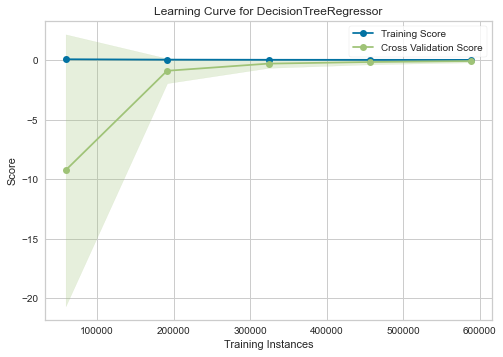

<AxesSubplot:title={'center':'Learning Curve for DecisionTreeRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [44]:
# Plot the learning curve
cv = 10
sizes = np.linspace(0.1, 1.0, 5)
visualizer = LearningCurve(estimator=tree_regr, cv=cv, scoring='r2', train_sizes=sizes, n_jobs=4, random_state=123)
visualizer.fit(X, y)
visualizer.show()

Simmilarly to the Linear Regression Model, the Learning curve obtained for the Decision Tree model follows the same evolution as training instances increase, i.e, the gap between training score and the cross validation score tends to decrease.

In [45]:
# Create and train the model
tree_regr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=123)

In [46]:
# Explore feature importance (Gini importance - normalized)
formattedList = [float(format(member,'.6f')) for member in tree_regr.feature_importances_]
formattedList2 = [abs(float(format(member,'.6f'))) for member in tree_regr.feature_importances_]
data_tuples = list(zip(X.columns,formattedList,formattedList2))
coeff_df = pd.DataFrame(data=data_tuples, columns=['Feature','Coefficient','AbsCoefficient'])
coeff_df.reset_index(drop=True, inplace=True)
coeff_df.sort_values(by=['AbsCoefficient'], inplace=True, ascending=False)
coeff_df

,Feature,Coefficient,AbsCoefficient
7,VehAge,0.450850,0.450850
16,VehGas_Regular,0.203683,0.203683
10,VehBrand_B12,0.188515,0.188515
6,VehPower,0.084458,0.084458
9,BonusMalus,0.036929,0.036929
8,DrivAge,0.010941,0.010941
23,Region_R91,0.008299,0.008299
18,Density,0.007290,0.007290
11,VehBrand_B6,0.006568,0.006568
26,Region_R11,0.002148,0.002148


As one can observe from the obtained coeficients, all of them influence positively the number of claims per year. Also, it is possible to observe that some of them are zero, which means that those specific variables (for instance, Region 31 does not explain the number of claims even though Region 91 does.

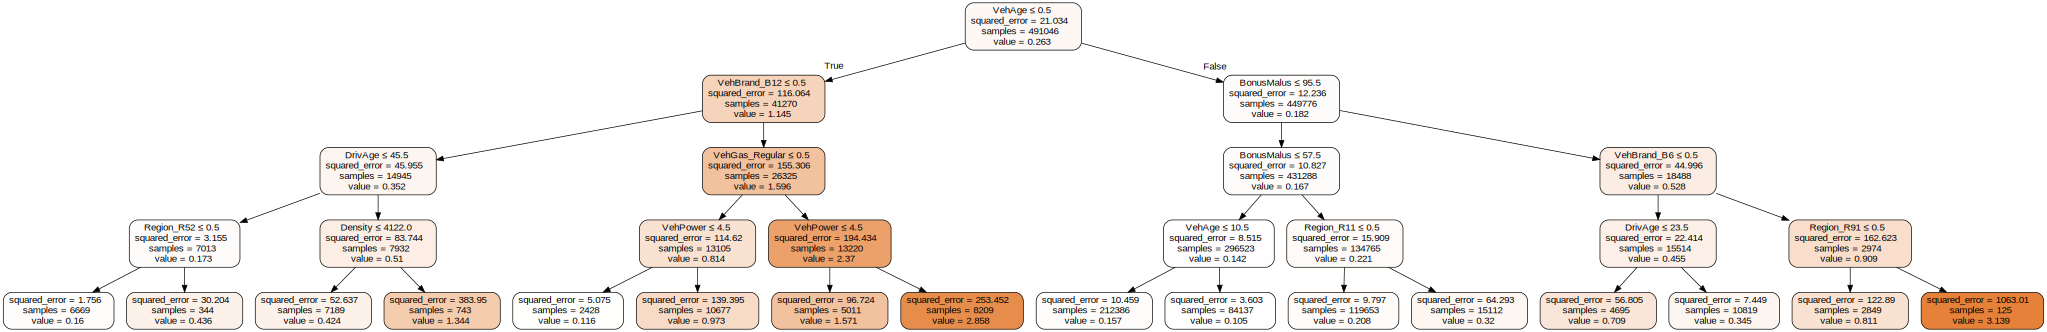

In [47]:
# Plot the tree
dot_data = tree.export_graphviz(tree_regr, out_file=None, 
                      feature_names=list(X_train.columns),  
                      class_names='Returns',  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## Evaluation DT

In [48]:
# predict y for X_train and X_test
y_pred_train = tree_regr.predict(X_train) 
y_pred_test = tree_regr.predict(X_test) 

In [49]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['MAE','RMSE', 'R^2','MAPE (%)','MAX Error']
  train_results = [metricsObj.mean_absolute_error(yTrain, yPredTrain),
                np.sqrt(metricsObj.mean_squared_error(yTrain, yPredTrain)),
                metricsObj.r2_score(yTrain, yPredTrain),
                metricsObj.mean_absolute_percentage_error(yTrain, yPredTrain),
                metricsObj.max_error(yTrain, yPredTrain)]
  test_results = [metricsObj.mean_absolute_error(yTest, yPredTest),
                np.sqrt(metricsObj.mean_squared_error(yTest, yPredTest)),
                metricsObj.r2_score(yTest, yPredTest),
                  metricsObj.mean_absolute_percentage_error(yTest, yPredTest),
                metricsObj.max_error(yTest, yPredTest)]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [50]:
# Show performance results
resultsDF = performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,MAE,4.841439e-01,4.951278e-01
1,RMSE,4.568885e+00,4.757416e+00
2,R^2,7.570143e-03,8.245013e-03
3,MAPE (%),1.084499e+15,1.088088e+15
4,MAX Error,7.316798e+02,7.291425e+02


C:\Users\lotar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


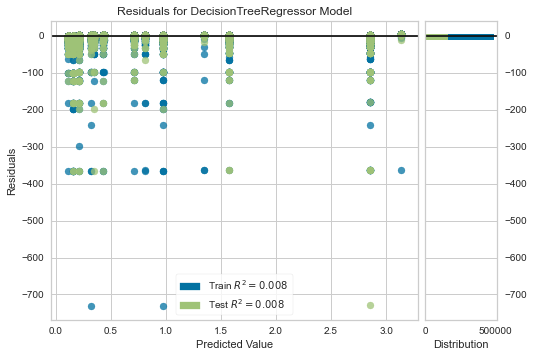

<AxesSubplot:title={'center':'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [51]:
# Visualize the residuals
residuals_vis = ResidualsPlot(tree_regr)
residuals_vis.fit(X_train, y_train)  # Fit the training data to the visualizer
residuals_vis.score(X_test, y_test)  # Evaluate the model on the test data
residuals_vis.show() 

C:\Users\lotar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


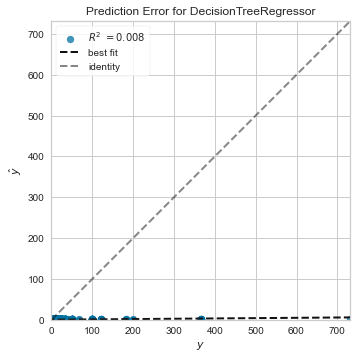

<AxesSubplot:title={'center':'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [52]:
# Visualize the prediction error
predError_vis = PredictionError(tree_regr)
predError_vis.fit(X_train, y_train)  # Fit the training data to the visualizer
predError_vis.score(X_test, y_test)  # Evaluate the model on the test data
predError_vis.show() 

Similarly to what was observed using the Linear Regression Model, for the Decision Tree model the results obtained in the training set are similar to the ones obtained using the test set. Evethough, onde again, all obtained measures show us that the model predictive power can be considered weak. 

Initialy, one could infer that the Decision Tree Model should return more robust results. Although, this was not the case. One possible reason for such is the fact that the initial dataset is extremely inbalanced (many more observations reporting zero claims than higher than zero). As well as that, a higher number of observations, meaning, a larger dataset, could lead to better results.